In [5]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [6]:
folder_path = '/SABench/data/AMBC_processed'
h5ad_files = [f for f in os.listdir(folder_path) if f.endswith('.h5ad')]

slices = []
slice_names = []

for file in h5ad_files:
    adata = sc.read_h5ad(os.path.join(folder_path, file))
    name = file.split('_')[1] 
    
    slices.append(adata)
    slice_names.append(name)

sorted_indices = sorted(range(len(slices)), key=lambda i: slices[i].n_obs * slices[i].n_vars)

slices = [slices[i] for i in sorted_indices]
slice_names = [slice_names[i] for i in sorted_indices]

print("Sorted anndata list:", slices)
print("Sorted name list:", slice_names)

Sorted anndata list: [AnnData object with n_obs × n_vars = 620 × 23371
    obs: 'ABA_acronym', 'ABA_name', 'ABA_parent', 'cluster_id', 'cluster_name', 'total_counts', 'Region'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 83381 × 248
    obs: 'total_counts'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 43858 × 483
    obs: 'total_counts'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 43341 × 1022
    obs: 'X', 'Y', 'Z', 'Main_molecular_cell_type', 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'total_counts'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 48113 × 950
    obs: 'spatialClusteringAssignments', 'total_counts'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 2702 × 32285
    obs: 'graphclust', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'graphclust_colors'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 62985 × 

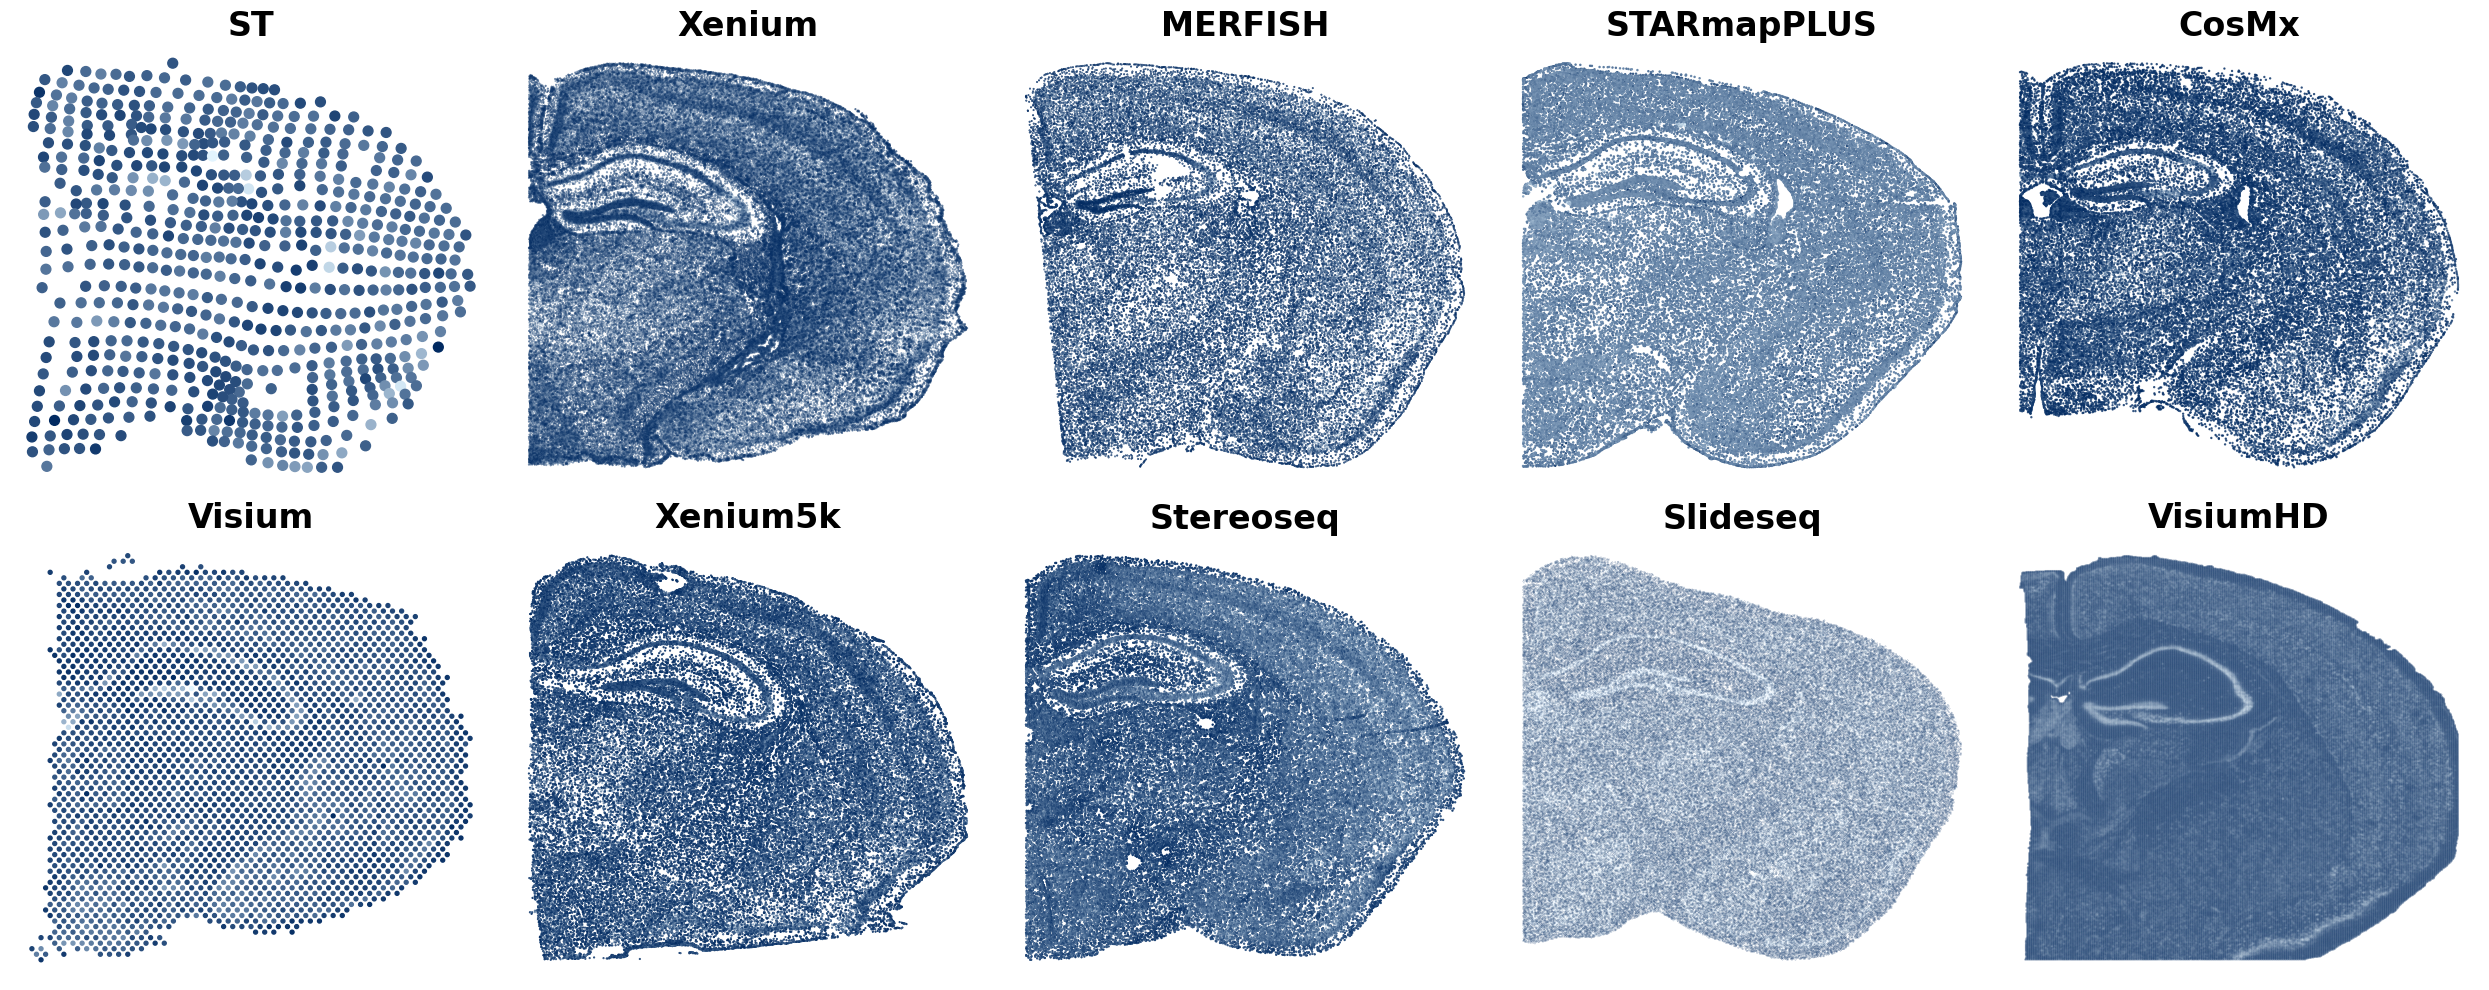

In [7]:
n_cols = (len(slices) + 1) // 2  
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

custom_cmap = LinearSegmentedColormap.from_list('my_cmap', ['#015696','#ffffff'] )
custom_cmap = LinearSegmentedColormap.from_list('my_cmap', ['#012A61','#E2F4FE'] )

plot_params = [
    {"s": 50, "vmin": None, "vmax": None, "alpha":1},  #1
    {"s": 0.3, "vmin": None, "vmax": None, "alpha":0.7},  #2
    {"s": 0.2, "vmin": None, "vmax": None, "alpha":1}, #3
    {"s": 0.6, "vmin": None, "vmax": None, "alpha":1},#4
    {"s": 0.5, "vmin": None, "vmax": None, "alpha":0.8},#5
    {"s": 8, "vmin": None, "vmax": None, "alpha":1},#6
    {"s": 0.3, "vmin": None, "vmax": None, "alpha":1},#7
    {"s": 0.5, "vmin": None, "vmax": None, "alpha":1},#8
    {"s": 0.01, "vmin": 50, "vmax": 200, "alpha":1},#9
    {"s": 0.01, "vmin": None, "vmax": None, "alpha":0.7}#10
]
for i, (adata, params) in enumerate(zip(slices, plot_params)):
    ax = axes[i]
    spatial_coords = adata.obsm['spatial']
    counts = adata.obs['total_counts']
    
    scatter = ax.scatter(
        spatial_coords[:, 0],
        spatial_coords[:, 1],
        c=counts,
        cmap=custom_cmap,
        s=params["s"],        
        vmin=params["vmin"],   
        vmax=params["vmax"],
        alpha=params["alpha"]
    )
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    
    ax.set_title(slice_names[i],fontsize=24,fontweight='bold',pad=5)      
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()